In [1]:
#Import libraries
import numpy as np
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input ,Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = (224, 224)
batch_size = 32

In [3]:
# Load the pre-trained VGG16 model without the top (classification) layer
vgg = VGG16(weights='imagenet', include_top=False,input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the weights of the pre-trained layers
for layer in vgg.layers:
    layer.trainable = False
    
# Define the Dense layer for predictions
x = Flatten()(vgg.output)
prediction = Dense(4 , activation='softmax')(x)
    
# Define the model
model = Model(inputs=vgg.input , outputs=prediction)
model.summary()
   

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
# Training Image preprocessing
train_datagen  = ImageDataGenerator(
rescale=1./255, 
rotation_range=20,
shear_range=0.2, 
zoom_range=0.2,                                                  
horizontal_flip=True,)   
training_set = train_datagen.flow_from_directory(
'train_G',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')


# Validation Image preprocessing
val_datagen = ImageDataGenerator(
rescale=1./255)
val_set = val_datagen.flow_from_directory(
'val_G',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')


# Testing Image preprocessing
test_datagen = ImageDataGenerator(
rescale=1./255)
test_set = test_datagen.flow_from_directory(
'test_G',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')

Found 2060 images belonging to 4 classes.
Found 220 images belonging to 4 classes.
Found 220 images belonging to 4 classes.


In [6]:
history = model.fit(x=training_set,validation_data=val_set,epochs=20) 

Epoch 1/20


C:\Users\Revotec\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 461s 7s/step - accuracy: 0.6782 - loss: 0.8328 - val_accuracy: 0.8727 - val_loss: 0.3535
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 525s 8s/step - accuracy: 0.8618 - loss: 0.3920 - val_accuracy: 0.8773 - val_loss: 0.2791
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 562s 9s/step - accuracy: 0.8766 - loss: 0.3137 - val_accuracy: 0.8591 - val_loss: 0.3632
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 515s 8s/step - accuracy: 0.8812 - loss: 0.2843 - val_accuracy: 0.9000 - val_loss: 0.2279
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 468s 7s/step - accuracy: 0.9190 - loss: 0.2132 - val_accuracy: 0.9045 - val_loss: 0.2875
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 497s 8s/step - accuracy: 0.8966 - loss: 0.2335 - val_accuracy: 0.8727 - val_loss: 0.3243
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 525s 8s/step - accuracy: 0.9309 - loss: 0.1941 - val_accuracy: 0.9091 - val_loss: 0.2133
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 519s 8s/step - accuracy: 0.9348 - loss: 0.1789 - val_accuracy: 0.9091 - val_loss: 0.

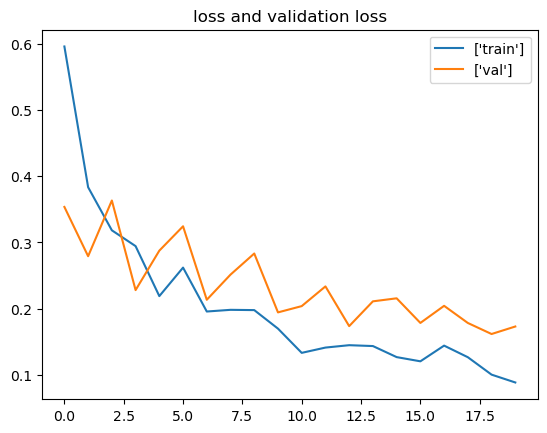

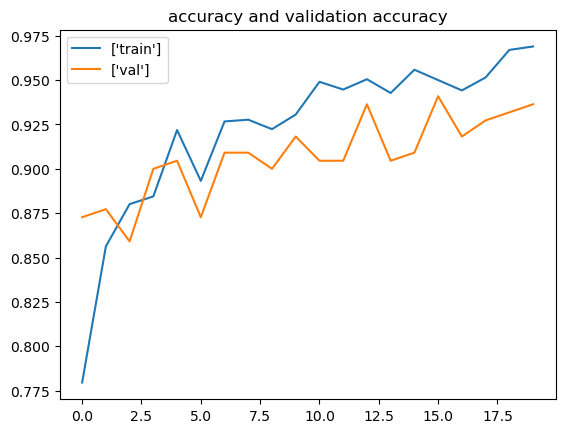

In [7]:
plt.plot(history.history['loss'], label=['train']) #loss de train
plt.plot(history.history['val_loss'], label=['val']) # loss de test
plt.title('loss and validation loss') # title
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label=['train']) #loss de train
plt.plot(history.history['val_accuracy'], label=['val']) # loss de test
plt.title('accuracy and validation accuracy') # title
plt.legend()
plt.show()

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_set)

7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.9451 - loss: 0.1158


In [9]:
model.save('Glob_DATA_VGG16_Nov_CNN.h5') 